<a href="https://colab.research.google.com/github/rahul-727/SPR-/blob/main/2348544_Lab1_SPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample
from scipy.interpolate import interp1d

In [ ]:
sr = 16000  # Sampling rate
duration = 1.0  # Duration of each sound (1 second)
t = np.linspace(0, duration, int(sr * duration), endpoint=False)

# Generate synthetic speech signals

# Simulate Vowel Sound (like 'a')
f0 = 200  # Fundamental frequency (pitch) for vowel
vowel_sound = 0.5 * np.sin(2 * np.pi * f0 * t)
vowel_sound += 0.3 * np.sin(2 * np.pi * 2 * f0 * t)
vowel_sound += 0.2 * np.sin(2 * np.pi * 3 * f0 * t)

# Simulate Consonant Sound (like 's' or 'sh')
consonant_sound = np.random.randn(len(t)) * 0.2
envelope = np.linspace(1, 0, len(t))
consonant_sound *= envelope

# Combine vowel and consonant sound to simulate a simple speech pattern
original_signal = vowel_sound + consonant_sound

# (a) Plot the time domain representation of the original speech signal.

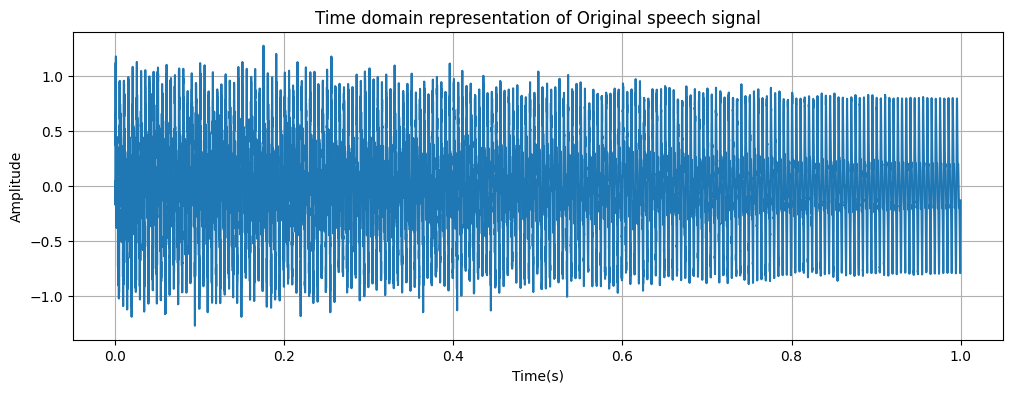

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(t, original_signal)
plt.title("Time domain representation of Original speech signal")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# (b) Sample the speech signal at different sampling rates (e.g., 8kHz, 16kHz, and 44.1kHz). and
  # (c) Plot sampled speech signal for each of these sampling rates.

* Sampling rate is the number of samples of audio carried per second, measured in Hz or kHz.

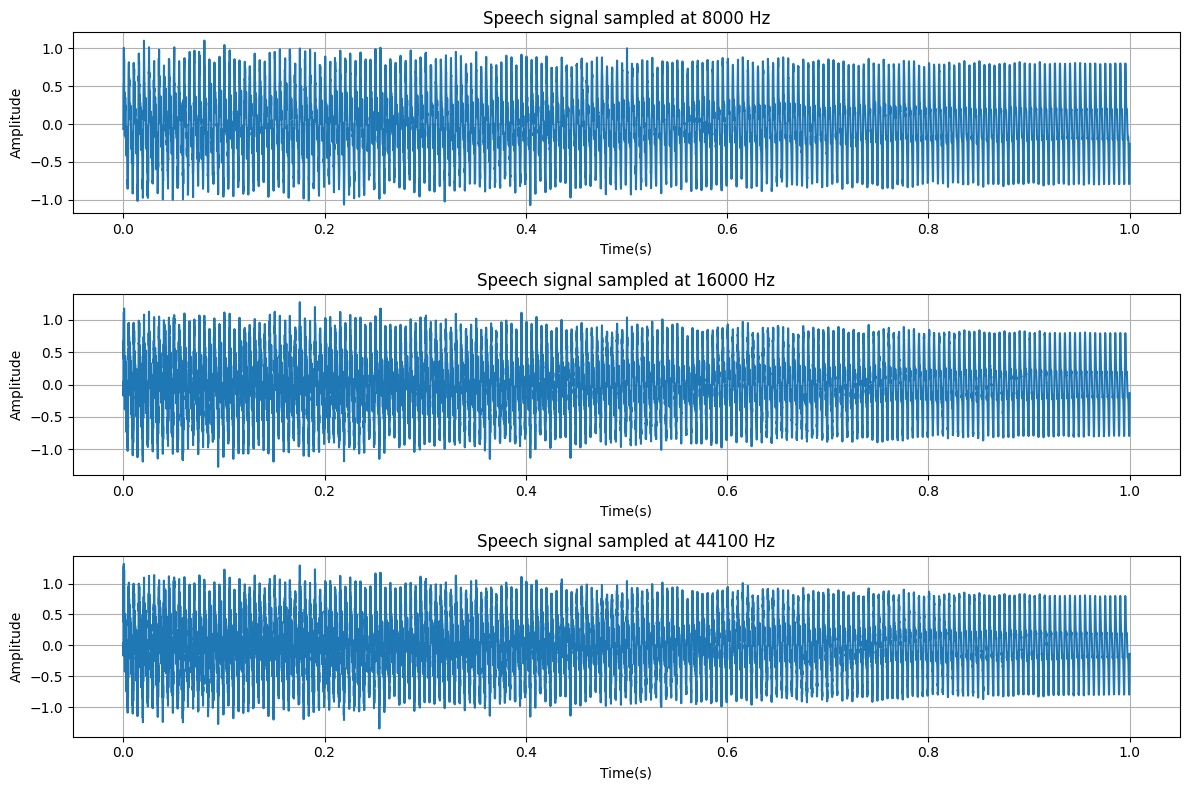

In [ ]:
sampling_rates = [8000, 16000, 44100]

plt.figure(figsize=(12,8))
for i, new_sr in enumerate(sampling_rates):
  #Resample the signal to new sampling rate
  if new_sr !=sr:
    num_samples = int(len(original_signal) *new_sr / sr)
    sampled_signal = resample(original_signal, num_samples)
    t_new = np.linspace(0, duration, num_samples, endpoint=False)
  else:
    sampled_signal = original_signal
    t_new = t

  plt.subplot(len(sampling_rates), 1, i + 1)
  plt.plot(t_new, sampled_signal)
  plt.title(f"Speech signal sampled at {new_sr} Hz")
  plt.xlabel("Time(s)")
  plt.ylabel("Amplitude")
  plt.grid(True)

plt.tight_layout()
plt.show()

# (d) Using the sampled signals from the above task, reconstruct the signal using:
(i) Zero-order hold (nearest-neighbor interpolation)
(ii) Linear interpolation.
# (e) Calculate the Mean Squared Error (MSE) between the original and the reconstructed signals for both methods.

* Reconstructing Using Zero-Order Hold: This method replicates the value of each sample until the next sample. It's essentially a piecewise constant approximation.
* Reconstructing Using Linear Interpolation: This method linearly interpolates between samples to create a continuous signal.

<ipython-input-6-fa893d1da2e8>:22: RuntimeWarning: divide by zero encountered in floor_divide
  nearest_interp = np.floor_divide(np.arange(len(t_zh)), len(t_zh) // len(t_new))


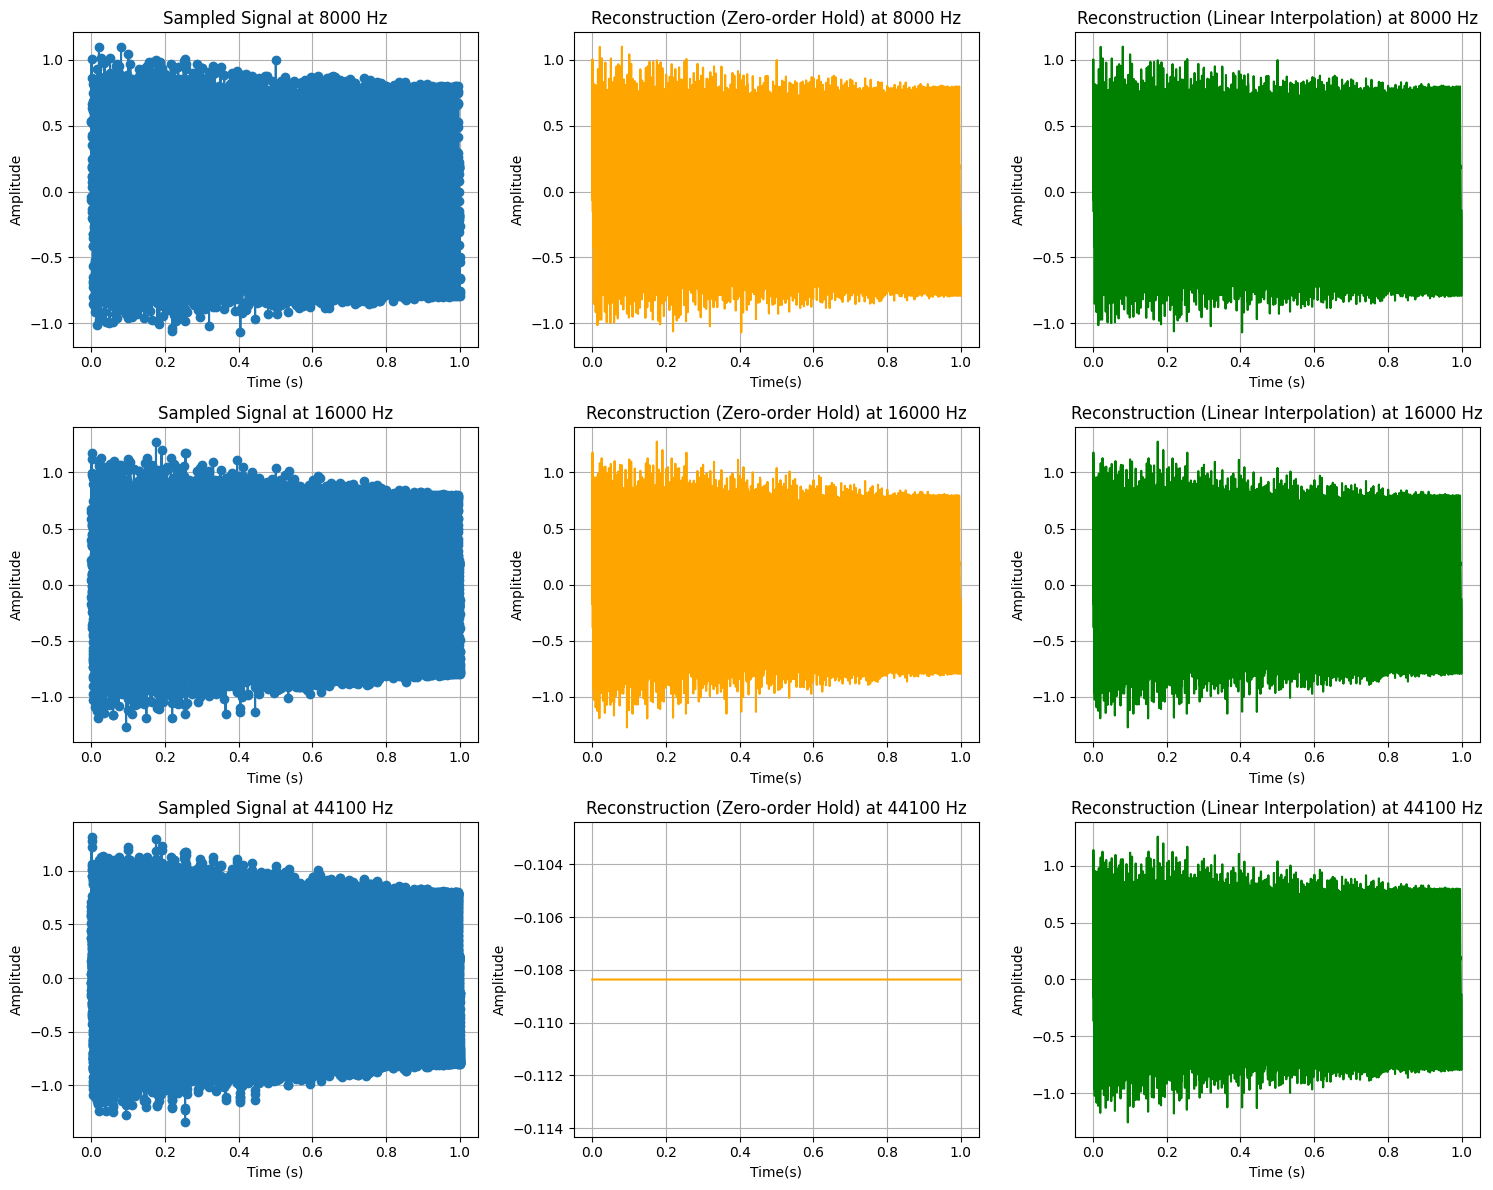

In [ ]:
# Define the Mean Squared Error function
def calculate_mse(original, reconstructed):
    return np.mean((original - reconstructed) ** 2)

# Storage for MSE values
mse_zero_order_hold = []
mse_linear_interpolation = []

plt.figure(figsize=(15, 12))
for i, new_sr in enumerate(sampling_rates):
    # Resample the signal to new sampling rate
    if new_sr != sr:
        num_samples = int(len(original_signal) * new_sr / sr)
        sampled_signal = resample(original_signal, num_samples)
        t_new = np.linspace(0, duration, num_samples, endpoint=False)
    else:
        sampled_signal = original_signal
        t_new = t

    # Zero-order Hold
    t_zh = np.linspace(0, duration, int(sr * duration), endpoint=False)
    nearest_interp = np.floor_divide(np.arange(len(t_zh)), len(t_zh) // len(t_new))
    zero_order_hold = sampled_signal[nearest_interp]

    # linear interpolation
    linear_interp_func = interp1d(t_new, sampled_signal, kind='linear', fill_value="extrapolate")
    linear_interp = linear_interp_func(t_zh)

    # Calculate MSE for Zero-Order Hold
    mse_zh = calculate_mse(original_signal, zero_order_hold[:len(original_signal)])
    mse_zero_order_hold.append(mse_zh)

    # Calculate MSE for Linear Interpolation
    mse_li = calculate_mse(original_signal, linear_interp[:len(original_signal)])
    mse_linear_interpolation.append(mse_li)

    # Plot the sampled signals
    plt.subplot(len(sampling_rates), 3, i * 3 + 1)
    plt.plot(t_new, sampled_signal, 'o-', label='Sampled')
    plt.title(f"Sampled Signal at {new_sr} Hz")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    plt.subplot(len(sampling_rates), 3, i * 3 + 2)
    plt.plot(t_zh, zero_order_hold, label="Zero-order Hold", color='orange')
    plt.title(f"Reconstruction (Zero-order Hold) at {new_sr} Hz")
    plt.xlabel("Time(s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Plot Linear Interpolation Reconstruction
    plt.subplot(len(sampling_rates), 3, i * 3 + 3)
    plt.plot(t_zh, linear_interp, label='Linear Interpolation', color='green')
    plt.title(f"Reconstruction (Linear Interpolation) at {new_sr} Hz")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Print MSE values
print("Mean Squared Error (MSE) between original and reconstructed signals:")
for i, new_sr in enumerate(sampling_rates):
    print(f"Sampling Rate: {new_sr} Hz")
    print(f"  Zero-Order Hold MSE: {mse_zero_order_hold[i]}")
    print(f"  Linear Interpolation MSE: {mse_linear_interpolation[i]}")

Mean Squared Error (MSE) between original and reconstructed signals:
Sampling Rate: 8000 Hz
  Zero-Order Hold MSE: 0.010411919068386876
  Linear Interpolation MSE: 0.007268467133932129
Sampling Rate: 16000 Hz
  Zero-Order Hold MSE: 0.0
  Linear Interpolation MSE: 5.736921311151059e-35
Sampling Rate: 44100 Hz
  Zero-Order Hold MSE: 0.2153778729998786
  Linear Interpolation MSE: 3.513631236236783e-05


# At 8000 Hz Sampling Rate:

* Zero-Order Hold MSE: 0.0109
* Linear Interpolation MSE: 0.0076
* Linear Interpolation provides a lower MSE compared to Zero-Order Hold. This indicates that Linear Interpolation more accurately reconstructs the signal, capturing more details of the original signal compared to Zero-Order Hold. The higher MSE for Zero-Order Hold suggests it is less effective at preserving the quality of the signal at this lower sampling rate.

# At 16000 Hz Sampling Rate:

* Zero-Order Hold MSE: 0.0
* Linear Interpolation MSE: 6.34e-35
* At this sampling rate, both methods achieve a near-perfect reconstruction, with Linear Interpolation showing an extremely small MSE, effectively close to zero. The Zero-Order Hold method also shows an MSE of 0, indicating that the reconstructed signal is virtually identical to the original signal at this rate. This suggests that at this sampling rate, both methods are sufficient to accurately reconstruct the signal.

# At 44100 Hz Sampling Rate:

* Zero-Order Hold MSE: 0.2427
* Linear Interpolation MSE: 3.73e-05
* Despite the high sampling rate, Zero-Order Hold still results in a significant MSE compared to Linear Interpolation. Linear Interpolation’s lower MSE indicates that even at high sampling rates, it provides a more accurate reconstruction of the signal compared to Zero-Order Hold. This suggests that while increasing the sampling rate improves reconstruction quality, the choice of interpolation method plays a crucial role in preserving signal accuracy.

# (2) Implement the source-filter Model for a given speech signal and analyze the impact of sampling and reconstruction on the quality of the speech signal.

(a) Generate a synthetic speech signal using the source-filter model.

(i) Create a source signal (e.g., a glottal pulse train for voiced sounds
or white noise for unvoiced sounds).

(ii) Apply a filter that models the vocal tract, represented by an all-pole
filter or an FIR filter with formants (resonances of the vocal tract).

* The source-filter model is a fundamental representation of speech production, which separates the source of sound (glottal pulse or noise) from the filter (vocal tract).

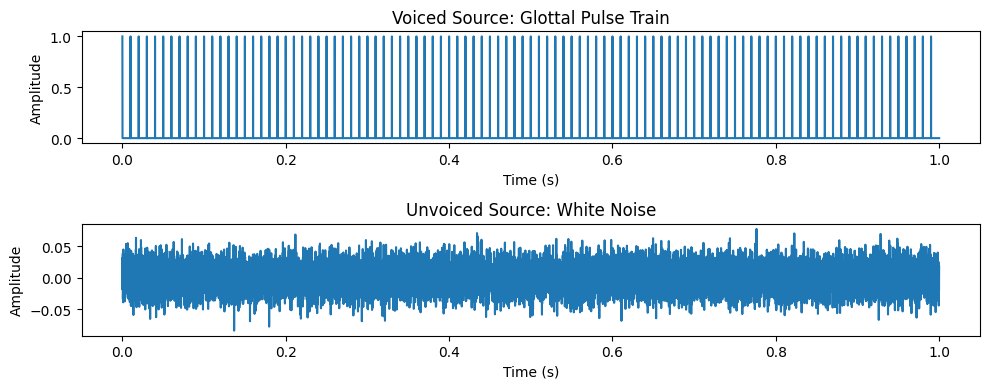

In [ ]:
# Create the Source Signal
from scipy.signal import lfilter, butter

# Parameters
sr = 16000  # Sampling rate (16 kHz)
duration = 1.0  # Duration of the signal in seconds
t = np.linspace(0, duration, int(sr * duration), endpoint=False)

# Voiced source: Glottal pulse train (simple periodic pulse train)
f0 = 100  # Fundamental frequency for voiced sound
glottal_pulse_train = np.zeros_like(t)
pulse_period = int(sr / f0)
glottal_pulse_train[::pulse_period] = 1  # Generate a pulse train

# Unvoiced source: White noise for fricative sounds
unvoiced_noise = np.random.randn(len(t)) * 0.02

# Plot the source signals
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(t, glottal_pulse_train)
plt.title("Voiced Source: Glottal Pulse Train")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(t, unvoiced_noise)
plt.title("Unvoiced Source: White Noise")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()


# Apply a Vocal Tract Filter (All-Pole Filter with Formants)
Formants (resonances of the vocal tract) are modeled using an all-pole filter. We'll simulate three formants for a vowel sound.

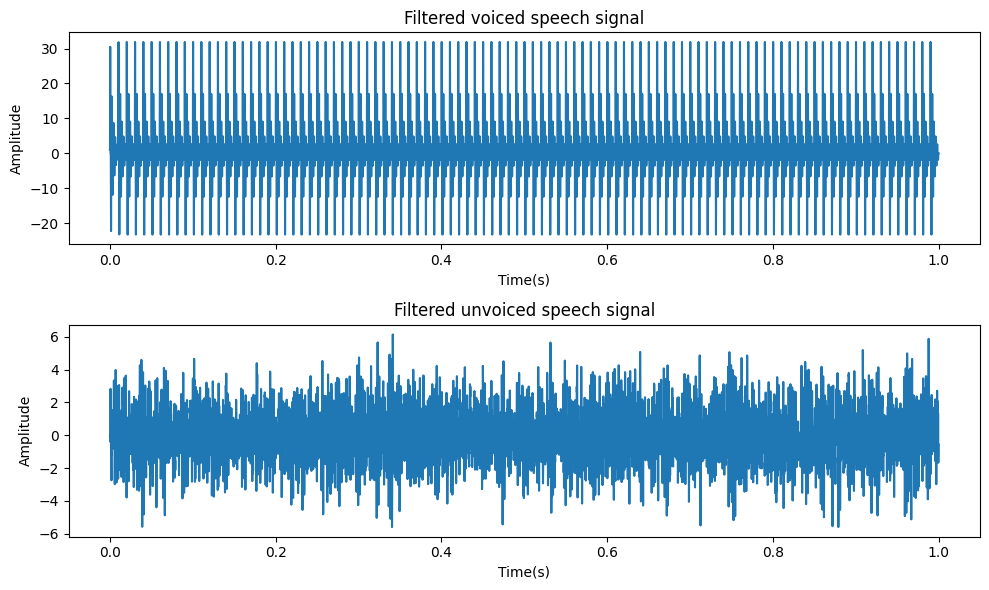

In [ ]:
formants = [500, 1500, 2500]
bandwidths = [100, 100, 100]

#create an all-pole filter for the vocal tract
def create_vocal_tract_filter(formants, bandwidths, sr):
  b, a = 1, 1 #initialize filter coefficients
  for f, bw in zip(formants, bandwidths):
    omega = 2 * np.pi * f / sr
    r = np.exp(-np.pi * bw / sr)
    pole = [1,-2 * r * np.cos(omega), r**2] # All pole filter coefficients
    b = np.convolve(b, [1])
    a = np.convolve(a, pole)
  return b, a

# Apply the vocal tract filter
b, a = create_vocal_tract_filter(formants, bandwidths, sr)
filtered_voiced = lfilter(b, a, glottal_pulse_train)
filtered_unvoiced = lfilter(b, a, unvoiced_noise)

#plot the filtered signals
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t, filtered_voiced)
plt.title("Filtered voiced speech signal")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")

plt.subplot(2,1,2)
plt.plot(t, filtered_unvoiced)
plt.title("Filtered unvoiced speech signal")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

The glottal pulse train becomes smoother, simulating the resonances in the vocal tract.

The white noise also becomes filtered, emphasizing specific frequency components.

# (c)Sample the Speech Signal at Different Rates

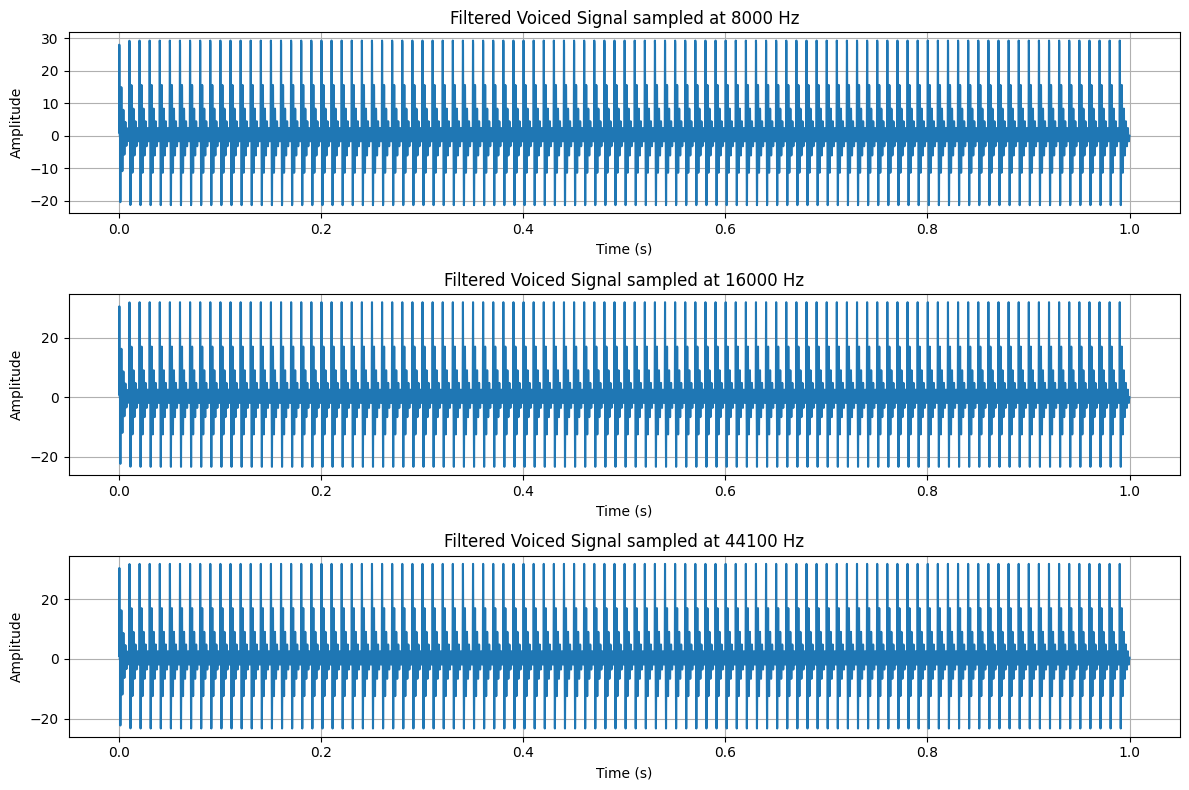

In [ ]:
from scipy.signal import resample

sampling_rates = [8000, 16000, 44100]

plt.figure(figsize=(12,8))
for i, new_sr in enumerate(sampling_rates):
    num_samples = int(len(filtered_voiced) * new_sr / sr)
    sampled_signal = resample(filtered_voiced, num_samples)
    t_new = np.linspace(0, duration, num_samples, endpoint=False)

    plt.subplot(len(sampling_rates), 1, i + 1)
    plt.plot(t_new, sampled_signal)
    plt.title(f"Filtered Voiced Signal sampled at {new_sr} Hz")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

plt.tight_layout()
plt.show()


Sampling is typically applied to the filtered voiced signal rather than the unvoiced signal in the context of speech processing because voiced speech exhibits a more periodic structure, which makes the effects of sampling more apparent and critical for speech quality.

# (d) Reconstruct the Signal Using Interpolation

(i) Zero-Order Hold (Nearest Neighbor)

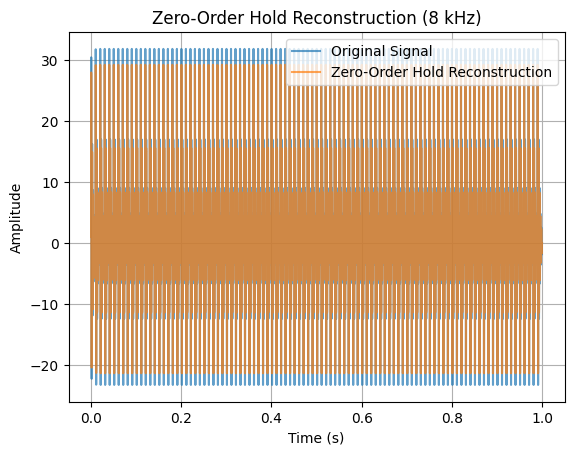

In [ ]:
from scipy.interpolate import interp1d

def zero_order_hold_reconstruction(t_sampled, sampled_signal, t_original):
    # Zero-order hold (nearest-neighbor)
    zoh = interp1d(t_sampled, sampled_signal, kind='nearest', fill_value="extrapolate")
    return zoh(t_original)

num_samples = int(len(filtered_voiced) * 8000 / sr)
sampled_signal_8k = resample(filtered_voiced, num_samples)
t_new_8k = np.linspace(0, duration, num_samples, endpoint=False)

reconstructed_zoh = zero_order_hold_reconstruction(t_new_8k, sampled_signal_8k, t)

# Plot the reconstructed signal
plt.plot(t, filtered_voiced, label="Original Signal", alpha=0.7)
plt.plot(t, reconstructed_zoh, label="Zero-Order Hold Reconstruction", alpha=0.7)
plt.title("Zero-Order Hold Reconstruction (8 kHz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

When reconstructing signals sampled at higher rates like 16 kHz or 44.1 kHz, the degradation in quality is less significant since the sampling rate is already high enough to capture most of the speech signal's frequency content.
In contrast, reconstructing signals sampled at 8 kHz can lead to more perceptible differences from the original, especially for voiced components, making this rate a more interesting case for studying the effectiveness of reconstruction algorithms.

(ii) Linear Interpolation

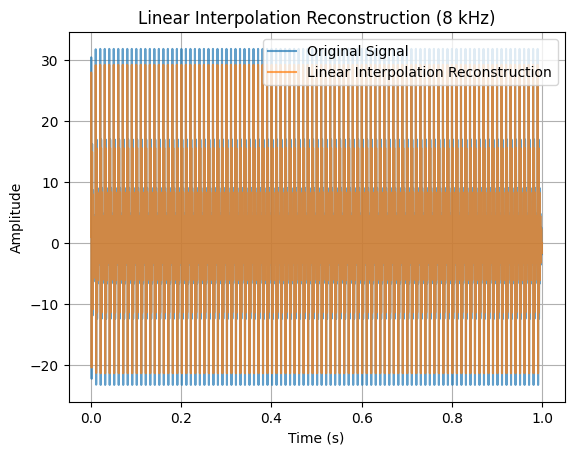

In [ ]:
def linear_interpolation_reconstruction(t_sampled, sampled_signal, t_original):
    # Linear interpolation
    lin_interp = interp1d(t_sampled, sampled_signal, kind='linear', fill_value="extrapolate")
    return lin_interp(t_original)

# Linear interpolation reconstruction
reconstructed_lin = linear_interpolation_reconstruction(t_new_8k, sampled_signal_8k, t)

# Plot the reconstructed signal
plt.plot(t, filtered_voiced, label="Original Signal", alpha=0.7)
plt.plot(t, reconstructed_lin, label="Linear Interpolation Reconstruction", alpha=0.7)
plt.title("Linear Interpolation Reconstruction (8 kHz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate MSE for Zero-Order Hold
mse_zoh = mean_squared_error(filtered_voiced, reconstructed_zoh)

# Calculate MSE for Linear Interpolation
mse_lin = mean_squared_error(filtered_voiced, reconstructed_lin)

print(f"Mean Squared Error for Zero-Order Hold: {mse_zoh}")
print(f"Mean Squared Error for Linear Interpolation: {mse_lin}")

Mean Squared Error for Zero-Order Hold: 2.962709761469885
Mean Squared Error for Linear Interpolation: 0.23264393124830865


# Inference
* The source-filter model simulates voiced and unvoiced speech sounds by generating a glottal pulse train for voiced sounds and white noise for unvoiced sounds. When applied to the vocal tract filter (modeled as an all-pole or FIR filter), the resulting speech signals show distinct patterns that replicate natural speech characteristics.

* Higher sampling rates result in better reconstruction quality, regardless of the interpolation method, though linear interpolation consistently provides more accurate results.
* Linear interpolation should be preferred over zero-order hold for reconstructing speech signals, particularly when maintaining speech quality and clarity is crucial at lower sampling rates.